# (1) Sentiment Analysis

In [ ]:
'''
Q1: Open "tweet_stream_halloween_1000.json" and create a list of tweets, "Tweets".
'''

In [1]:
import json
from textblob import TextBlob

infile = open('tweet_stream_halloween_1000.json')
data = json.load(infile)
infile.close()

Tweets = []

for t in data:
    Tweets.append(t['text'])

In [ ]:
'''
Q2: Create two lists (e.g. "sub_list", "pol_list") that have the subjectivity scores and polarity scores of all the tweets.
''' 

In [2]:
sub_list = []
pol_list = []

for t in Tweets:
    tb = TextBlob(t)
    sub_list.append(tb.sentiment.subjectivity)
    pol_list.append(tb.sentiment.polarity)

In [ ]:
'''
Q3: (1) Display a histogram of the subjectivy of 1K tweets.
    (2) Save the histogram as "subjectibity_1K_Tweets.pdf".
'''

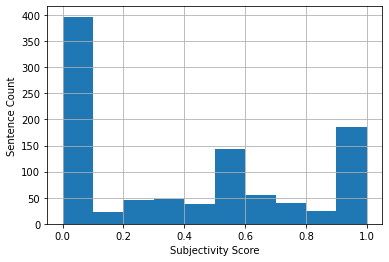

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(sub_list, bins = 10)
plt.xlabel('Subjectivity Score')
plt.ylabel('Sentence Count')
plt.grid(True)
plt.savefig('subjectibility_1K_Tweets.pdf')

In [ ]:
'''
Q4. (1) Display a histogram of the polarity of 1K tweets.
    (2) Save the histogram as "polarity_1K_Tweets.pdf".
'''

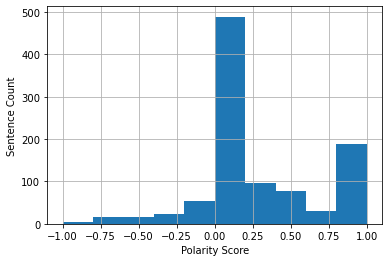

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(pol_list, bins = 10)
plt.xlabel('Polarity Score')
plt.ylabel('Sentence Count')
plt.grid(True)
plt.savefig('polarity_1K_Tweets.pdf')
plt.show()

In [ ]:
'''
Q5: (1) Display a histogram of polarity of 1K tweets that removes objective tweets, which have 0 subjectivity score.
    (2) Save the histogram as "polarity_new_1K_Tweets.pdf".
'''

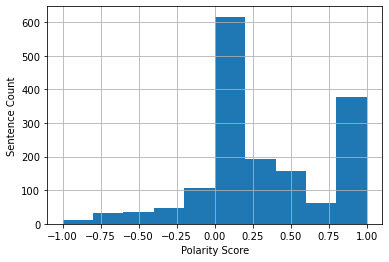

In [5]:
for t in Tweets:
    tb = TextBlob(t)
    if tb.sentiment.subjectivity != 0:
        sub_list.append(tb.sentiment.subjectivity)
        pol_list.append(tb.sentiment.polarity)
        
plt.hist(pol_list, bins = 10)
plt.xlabel('Polarity Score')
plt.ylabel('Sentence Count')
plt.grid(True)
plt.savefig('polarity_new_1K_Tweets.pdf')

# (2) Topic Modeling (NMF)



In [ ]:
'''
Q6: Open "tweet_stream_easter_1000.json" and create a list of 1K tweets and the corpus_contents for TF-IDF vectorization.
'''

In [6]:
import json
import numpy as np
from pprint import pprint

infile = open('tweet_stream_easter_1000.json')
data = json.load(infile)
infile.close()

Tweets = []

for t in data:
    Tweets.append(t['text'])

corpus_contents = []

for t in data:
    corpus_contents.append(t['text'])

In [ ]:
'''
Q7. (1) Vectorize the 1K tweets with TfidfVectorizer.
    (2) Create a document-term matrix (i.e. "doc_term_matrix").
    (3) Create a list of unique words (i.e. "unique_words").
'''

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)

doc_term_matrix = vectorizer.fit_transform(corpus_contents)

print(doc_term_matrix)

  (0, 391)	0.35719258303447654
  (0, 1272)	0.33011729533980066
  (0, 770)	0.35719258303447654
  (0, 414)	0.199719394182866
  (0, 393)	0.075000311800004
  (0, 716)	0.2607823424827461
  (0, 1279)	0.33011729533980066
  (0, 1145)	0.366426678993408
  (0, 1045)	0.366426678993408
  (0, 1138)	0.366426678993408
  (0, 1008)	0.10269475798362519
  (1, 624)	0.117290415240031
  (1, 105)	0.2588127906220795
  (1, 25)	0.42162596479599157
  (1, 87)	0.2673940788487128
  (1, 236)	0.4454175341205642
  (1, 167)	0.4815374332321167
  (1, 444)	0.4815374332321167
  (1, 393)	0.08852949452095617
  (2, 318)	0.3210210225540688
  (2, 649)	0.28834699011063314
  (2, 253)	0.21573246803384047
  (2, 36)	0.3074600738373894
  (2, 8)	0.3074600738373894
  (2, 855)	0.28834699011063314
  :	:
  (995, 624)	0.12629385230966078
  (995, 393)	0.09532518819374594
  (996, 629)	0.44360237623448817
  (996, 839)	0.49239390911000896
  (996, 338)	0.5070700727351072
  (996, 177)	0.5250322453303855
  (996, 624)	0.13352518666405955
  (996, 39

In [8]:
unique_words = vectorizer.get_feature_names() 
print(unique_words)

['000', '01637', '10', '10am', '10th', '11', '11th', '12', '12th', '13th', '14', '14th', '15', '15th', '160', '17', '17th', '18', '18th', '19', '19th', '1st', '20', '200', '2019', '20th', '21', '21st', '22nd', '247lovinglife', '25', '26', '28', '2xmki3xxre', '30', '30mins', '30pm', '357avul9r0', '36', '40', '4lkqou7pyk', '50', '5th', '67', '75', '7gkgwmtz2h', '7th', '7x7', '84igjhetvq', '877555', '8pm', '8th', '9pm', '9quyjptbzl', '9th', 'aaamu_rys19', 'abilities', 'able', 'abroad', 'absolute', 'academy', 'accepting', 'acenewquay', 'activities', 'actually', 'add', 'added', 'addition', 'adorable', 'adults', 'aenfocadtd', 'afternoon', 'afternoons', 'age', 'aged', 'ah', 'ain', 'air', 'al', 'aldiuk', 'alert', 'alex', 'allp1', 'alright', 'altrincham', 'altrinchambid', 'amazing', 'amp', 'andrealeadsom', 'ang4vapv26', 'angryjoeshow', 'annoucement', 'announce', 'announced', 'announcement', 'annual', 'answer', 'anthemsixx', 'antiqueclique', 'apostles', 'appaa_arkpriory', 'apply', 'approaching',

In [ ]:
'''
Q8: (1) Perform NMF decomposition using a document-term matrix with TfidfVectorizer.
    (2) Set the number of topics to 7.
    (3) Create a document-topic matrix (i.e. "doc_top_matrix") and a topic-term matrix (i.e. "top_term_matrix").
'''

In [9]:
from sklearn import decomposition

num_topics = 7

clf = decomposition.NMF(n_components = num_topics)

doc_top_matrix = clf.fit_transform(doc_term_matrix)

print(doc_top_matrix)

[[0.05037002 0.00360844 0.0043616  ... 0.         0.01844328 0.        ]
 [0.04742787 0.         0.         ... 0.         0.05042501 0.06726873]
 [0.01616372 0.00182809 0.00388993 ... 0.00075566 0.09142365 0.        ]
 ...
 [0.00434349 0.         0.         ... 0.         0.         0.        ]
 [0.00341369 0.0003687  0.         ... 0.         0.         0.        ]
 [0.01100788 0.00066708 0.         ... 0.26117198 0.         0.        ]]


C:\Users\Blake\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [10]:
top_term_matrix = clf.components_

print(top_term_matrix)

[[4.92025794e-03 9.73287149e-04 5.10370323e-02 ... 9.73287149e-04
  1.06346265e-03 1.43078060e-03]
 [0.00000000e+00 4.18793924e-03 0.00000000e+00 ... 4.18793924e-03
  6.47488478e-04 1.10722297e-04]
 [4.87472834e-04 5.13604817e-04 0.00000000e+00 ... 5.13604817e-04
  7.51528481e-04 2.97642846e-04]
 ...
 [0.00000000e+00 1.44461940e-05 0.00000000e+00 ... 1.44461940e-05
  5.68394388e-05 0.00000000e+00]
 [2.31659818e-02 1.44826080e-03 2.79801805e-02 ... 1.44826080e-03
  2.85970475e-03 2.61888186e-04]
 [0.00000000e+00 6.53785687e-03 1.72377503e-02 ... 6.53785687e-03
  0.00000000e+00 0.00000000e+00]]


In [ ]:
'''
Q9: Display the constructed topics with the top 6 keywords.
'''

In [15]:
import numpy as np
from pprint import pprint

num_top_words = 6

np.argsort(topic_1)[-num_top_words:][::-1]

print(unique_words[624], unique_words[393], unique_words[1008], unique_words[414], unique_words[416], unique_words[752])

https easter rt egg eggs make


In [16]:
topic_words = []

for topic in clf.components_:

    word_idx = np.argsort(topic)[-num_top_words:]
    
    temp_lst = []
    for idx in word_idx[::-1]: 
        temp_lst.append(unique_words[idx])
        
    topic_words.append(temp_lst)
    
pprint(topic_words)

[['https', 'easter', 'rt', 'basket', 'make', 'great'],
 ['grown', 'shazam', 'loudly', 'argue', 'superpowers', 'passionately'],
 ['getting',
  'passover',
  'theradr',
  'problematic',
  'appropriationisitc',
  'seders'],
 ['ve', 'got', 'kasson_wvu', 'different', 'inoculated', 'called'],
 ['bunny', 'themed', 'available', '84igjhetvq', 'undecided', 'labradorite'],
 ['april', 'just', 'win', 'follow', 'break', 'tweet'],
 ['coming', 'amp', 'football', 'poster', 'trials', 'education'],
 ['wreath', 'spring', 'decor', 'floral', 'bunny', 'door'],
 ['womaninbiz', 'wnukrt', 'tpdesigns1', 'order', 'days', 'holder'],
 ['egg', 'easter', 'eggs', 'hunt', 'love', 'question']]


In [ ]:
'''
Q10: Perform topic modeling with "tweet_stream_easter_1000.json". Set the number of topics to 10 and 10 keywords.
'''

In [13]:
import json
import numpy as np
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
import numpy as np

infile = open('tweet_stream_easter_1000.json')
data = json.load(infile)
infile.close()

corpus_contents = []

for t in data:
    corpus_contents.append(t['text'])
    
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)
doc_term_matrix = vectorizer.fit_transform(corpus_contents)

unique_words = vectorizer.get_feature_names() 

num_topics = 10

clf = decomposition.NMF(n_components = num_topics)
doc_top_matrix = clf.fit_transform(doc_term_matrix)
top_term_matrix = clf.components_

topic_words = []
num_top_words = 10 

for topic in clf.components_:
    word_idx = np.argsort(topic)[-num_top_words: ]
    temp_lst = []
    for idx in word_idx[::-1]: 
        temp_lst.append(unique_words[idx])
    topic_words.append(temp_lst) 
    
pprint(topic_words)

[['https',
  'easter',
  'rt',
  'basket',
  'make',
  'great',
  'sunday',
  'good',
  'holiday',
  'ideas'],
 ['grown',
  'shazam',
  'loudly',
  'argue',
  'superpowers',
  'passionately',
  'old',
  'men',
  'boy',
  '14'],
 ['getting',
  'passover',
  'theradr',
  'problematic',
  'appropriationisitc',
  'seders',
  'closer',
  'reminder',
  'christian',
  'rt'],
 ['ve',
  'got',
  'kasson_wvu',
  'different',
  'inoculated',
  'called',
  'microbiology',
  'fungalpeeps',
  'fungi',
  'successful'],
 ['bunny',
  'themed',
  'available',
  '84igjhetvq',
  'undecided',
  'labradorite',
  'update',
  'date',
  'haydinmckenzie',
  'rt'],
 ['april',
  'just',
  'win',
  'follow',
  'break',
  'tweet',
  '18th',
  'winner',
  'luxury',
  'drawn'],
 ['coming',
  'amp',
  'football',
  'poster',
  'trials',
  'education',
  'details',
  'academy',
  'easter',
  'https'],
 ['wreath',
  'spring',
  'decor',
  'floral',
  'bunny',
  'door',
  'wall',
  'nursery',
  'room',
  'biancasteinfeld

C:\Users\Blake\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
